This code was originally written by Lin Lin Lee and then modified by Frederick Eberhardt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from natsort import natsorted # Must be pip-installed.
import math # For infinity
import sys

In [47]:
def matshow(data, title, title_caption=None, x=127, y=10, s=(None, None), colorbar=False, title_y=1.08, title_x=0.55, height=None, width=None, vrange=None):
    if height == None or width == None:
        fig, ax = plt.subplots(figsize=(5, 5))
    else:
        fig, ax = plt.subplots(figsize=(width,height))
    if vrange == None:
        m = ax.matshow(data, aspect="auto")
    else:
        m = ax.matshow(data, aspect="auto", vmin=vrange[0], vmax=vrange[1])
    if s[0] == None:
        ax.set_xticks(range(x))
        ax.set_xticklabels([i+1 for i in range(x)])
        ax.set_yticks(range(y))
        ax.set_yticklabels([i+1 for i in range(y)])
    else:
        ax.set_xticks([i*s[0] for i in range(int(x/s[0]))])
        ax.set_xticklabels([i*s[0] + 1 for i in range(int(x/s[0]))])
        ax.set_yticks([i*s[1] for i in range(int(y/s[1]))])
        ax.set_yticklabels([i*s[1] + 1 for i in range(int(y/s[1]))])
    if title_caption == None:
        plt.title(title, y=title_y, x=title_x)
    else:
        plt.title("(Fig. {})\n{}".format(title_caption, title), y=title_y, x=title_x)
    if colorbar:
        fig.colorbar(m)

In [179]:
def matshow_w_correct_axis(data, title, x=127, y=10, s=(None, None), colorbar=False, title_y=1.02, height=10, width=20, start_vlines=[], end_vlines=[], vrange=None, label_list=[], custom_labels=[]):
    fig, ax = plt.subplots(figsize=(width,height))
    
    if vrange == None:
        m = ax.matshow(data, cmap="YlGnBu", aspect="auto")
    else:
        m = ax.matshow(data, cmap="YlGnBu", aspect="auto", vmin=vrange[0], vmax=vrange[1])
    
    if s[0] == None:
        ax.set_xticks(range(x))
        ax.set_xticklabels([i+1 for i in range(x)])
        #ax.set_yticks(range(y))
        #ax.set_yticklabels([i+1 for i in range(y)])
    else:
        ax.set_xticks([i*s[0] for i in range(int(x/s[0]))])
        ax.set_xticklabels([i*s[0] + 1 for i in range(int(x/s[0]))])
        #ax.set_yticks([i*s[1] for i in range(int(y/s[1]))])
        #ax.set_yticklabels([i*s[1] + 1 for i in range(int(y/s[1]))])
    plt.title(title, y=title_y)
    
    if colorbar:
        fig.colorbar(m)
        
    if label_list != []:
        ax.set_yticks(range(y))
        ax.set_yticklabels(label_list)
    
    if start_vlines != []:
#         start_label_indices = [i for i in start_vlines]
#         ax.set_xticks(start_label_indices, minor=True)
#         ax.xaxis.grid(True, which='minor', color='white', linestyle='-', linewidth=1)
        ax.vlines(start_vlines, ymin=0, ymax=y-1, colors="red", linestyles="dashed")
    
    if end_vlines != []:
#         end_label_indices = [i for i in end_vlines]
#         ax.set_xticks(end_label_indices, minor=True)
#         ax.xaxis.grid(True, which='minor', color='magenta', linestyle='-', linewidth=1)
        ax.vlines(end_vlines, ymin=0, ymax=y-1, colors="blue", linestyles="dashed")
    
    if custom_labels != []:
        plt.draw()
        y_labels = [w.get_text() for w in ax.get_yticklabels()]
        y_locs = list(ax.get_yticks())
           
        for label in custom_labels:
            try:
                label_index = y_labels.index(label)
                ax.get_yticklabels()[label_index].set_color('red') 
                ax.get_yticklabels()[label_index].set_fontweight('bold')
            except:
                pass
        
        plt.draw()
    
    plt.plot()
    plt.show()
    plt.clf()

In [48]:
def single_runs():
    runs = sorted(glob.glob('PJM190215*_label.txt'))
    return runs

In [49]:
print(single_runs())

['PJM190215A_label.txt', 'PJM190215B_label.txt', 'PJM190215C_label.txt', 'PJM190215D_label.txt']


In [66]:
dfs = [pd.read_csv(i, header = None) for i in single_runs()]

In [62]:
def plot_correlation(corr_df, title,
                     vrange=[], figure_size=(50, 40), zero_diagonal=False):
    
    if zero_diagonal == True:
        np.fill_diagonal(corr_df.values, 0)
        
    if vrange == []:
        min_value = corr_df.min().min()
        max_value = corr_df.max().max()
    else:
        min_value = vrange[0]
        max_value = vrange[1]
    
    fig, ax = plt.subplots(figsize=figure_size)
    
    sns.heatmap(corr_df, ax=ax, cmap="YlGnBu", vmin=min_value, vmax=max_value) 
                #xticklabels=label_list, yticklabels=label_list)
    ax.set_title(title, fontsize=30)
    
    #x_labels = [w.get_text() for w in ax.get_xticklabels()]
    #x_locs = list(ax.get_xticks())
    #y_labels = [w.get_text() for w in ax.get_yticklabels()]
    #y_locs = list(ax.get_yticks())
    
    # The right and left vertical lines are not generalizable.
    #left_end_index = x_labels.index('1_R')
    #right_end_index = x_labels.index('201')
    #ax.set_xticks([left_end_index, right_end_index], minor=True)
    #ax.set_yticks([left_end_index, right_end_index], minor=True)
    #ax.xaxis.grid(True, which='minor', color='r', linestyle='-', linewidth=2)
    #ax.yaxis.grid(True, which='minor', color='r', linestyle='-', linewidth=2)
    
    #if x_custom_labels != [] or y_custom_labels != []:
        
    #    plt.draw()
    #    
    #    for label in x_custom_labels:
    #        try:
    #            label_index = x_labels.index(label)
    #            ax.get_xticklabels()[label_index].set_color('red') 
    #            ax.get_xticklabels()[label_index].set_fontweight('bold')
    #        except:
    #            pass
    #        
    #    for label in y_custom_labels:
    #        try:
    #            label_index = y_labels.index(label)
    #            ax.get_yticklabels()[label_index].set_color('blue') 
    #            ax.get_yticklabels()[label_index].set_fontweight('bold')
    #        except:
    #            pass
    #    
    #    plt.draw()
    
    plt.plot()
    plt.show()
    plt.clf()

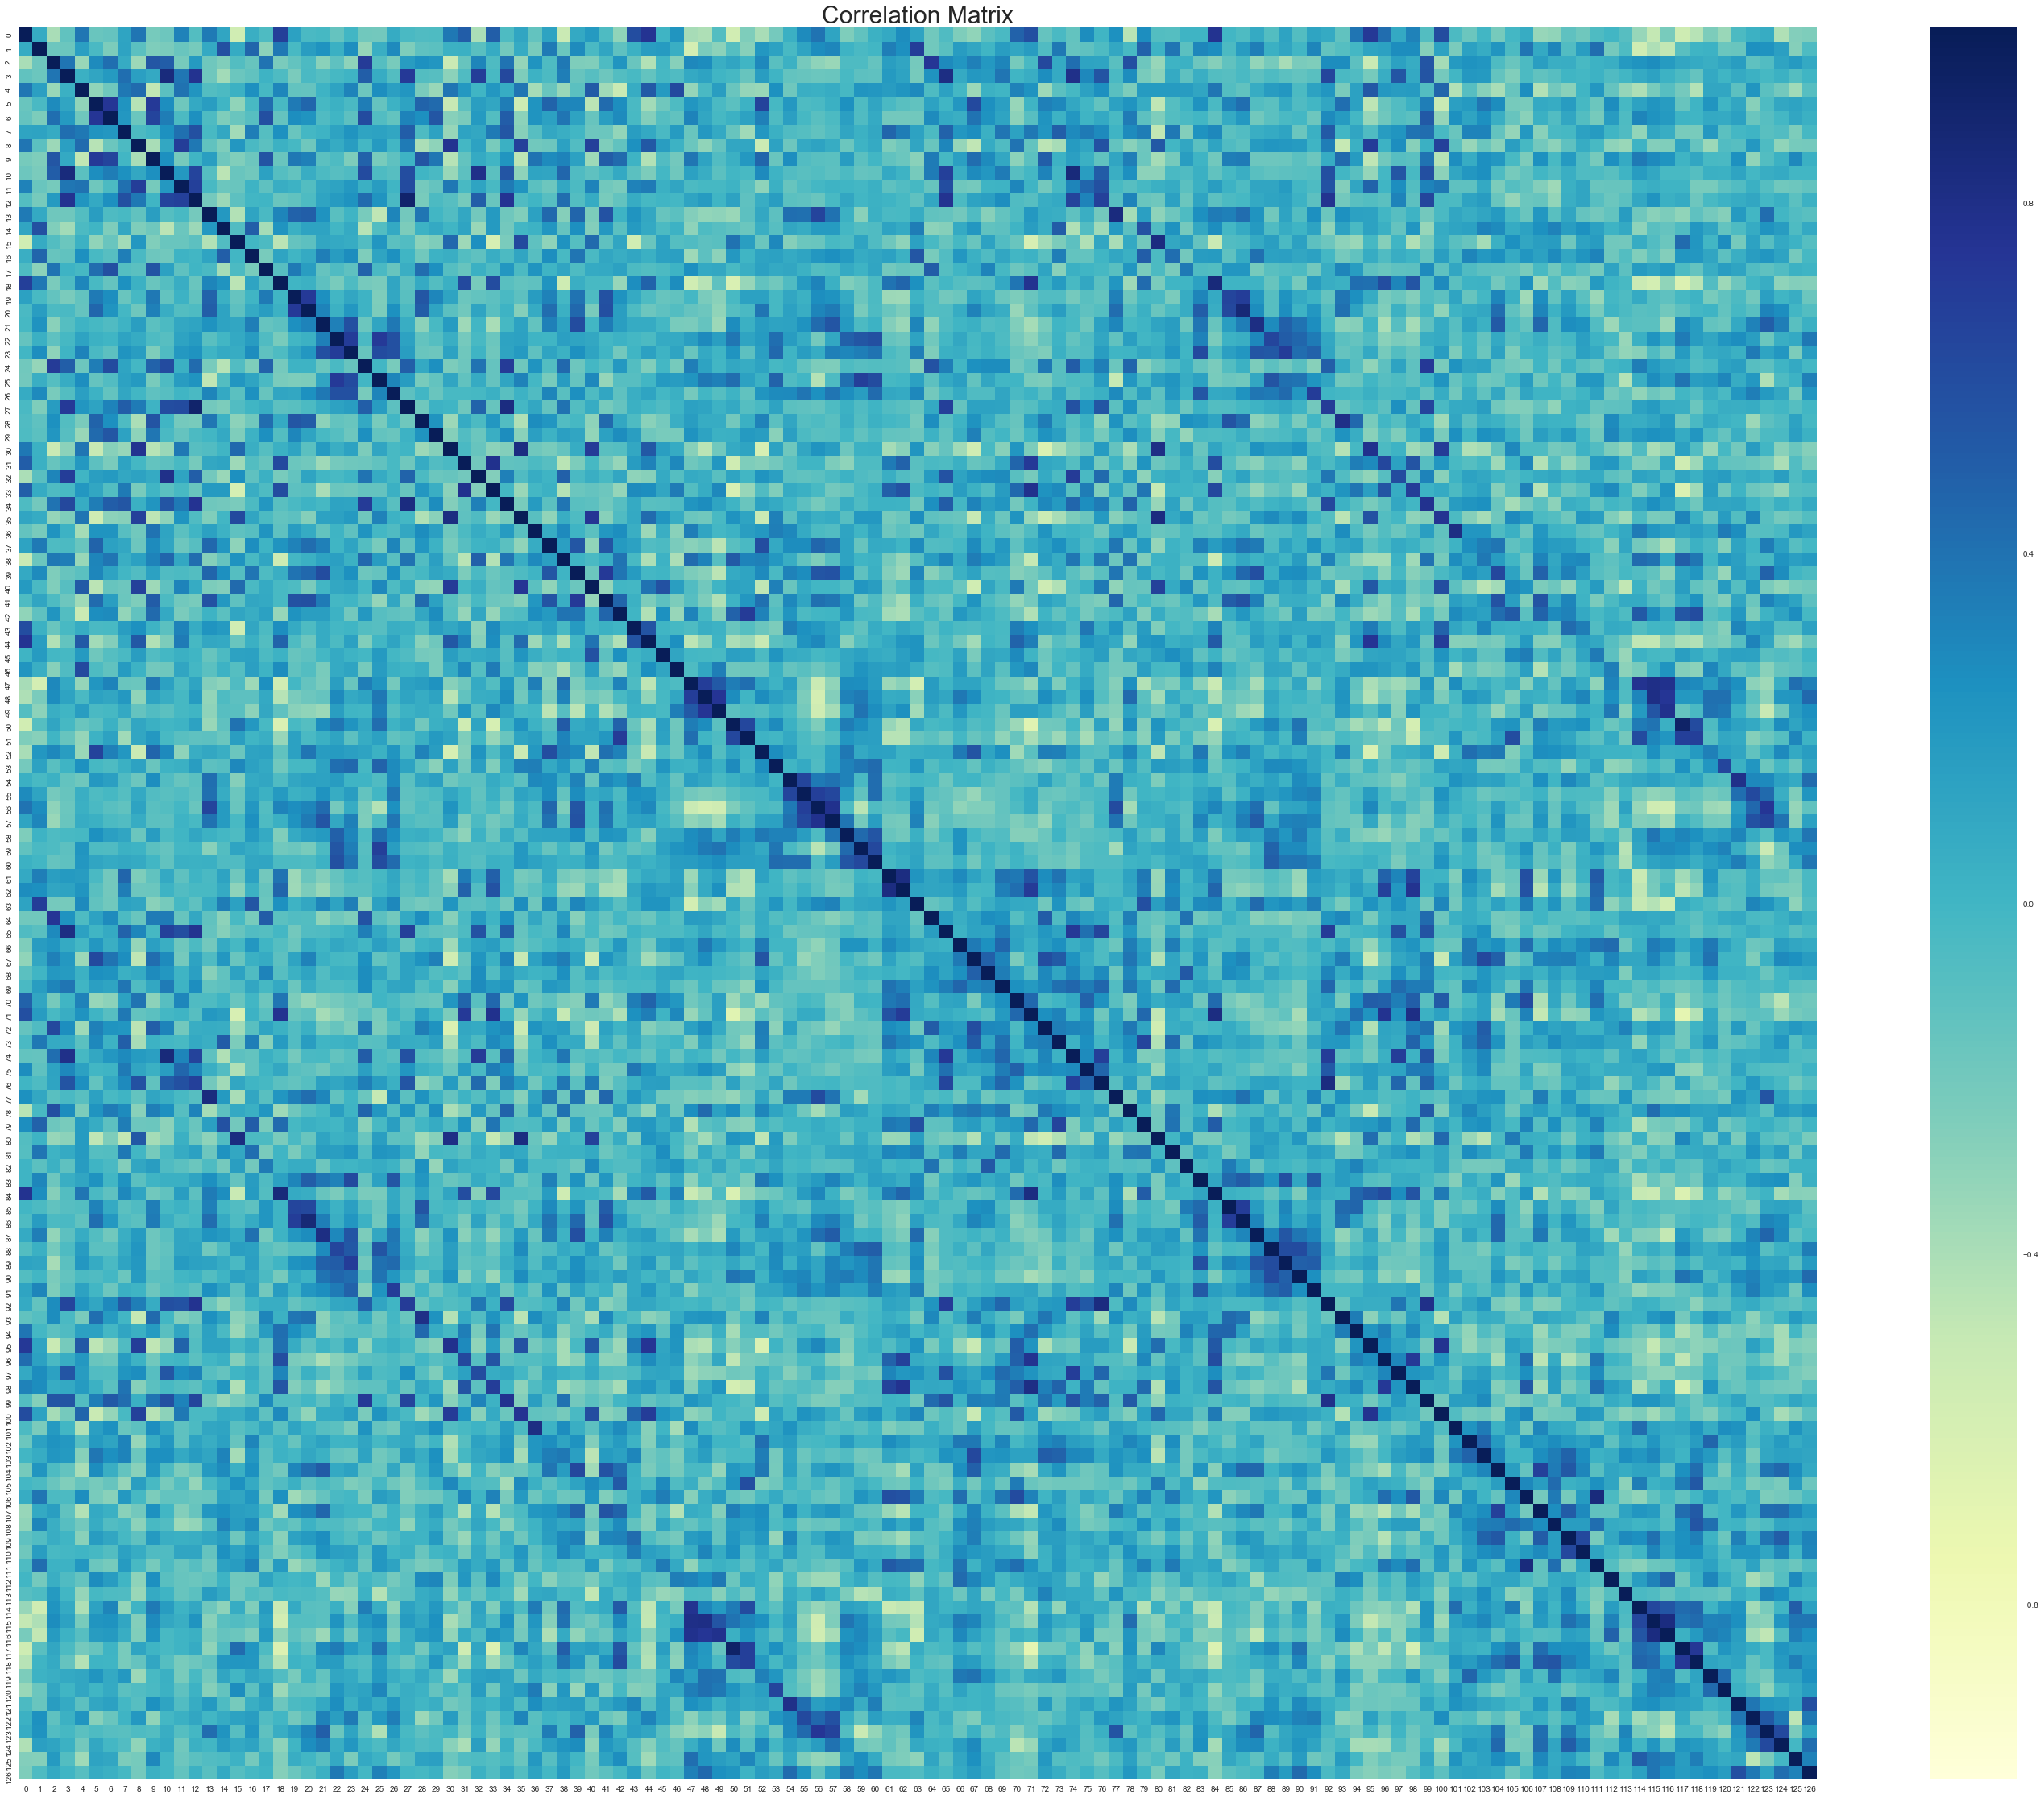

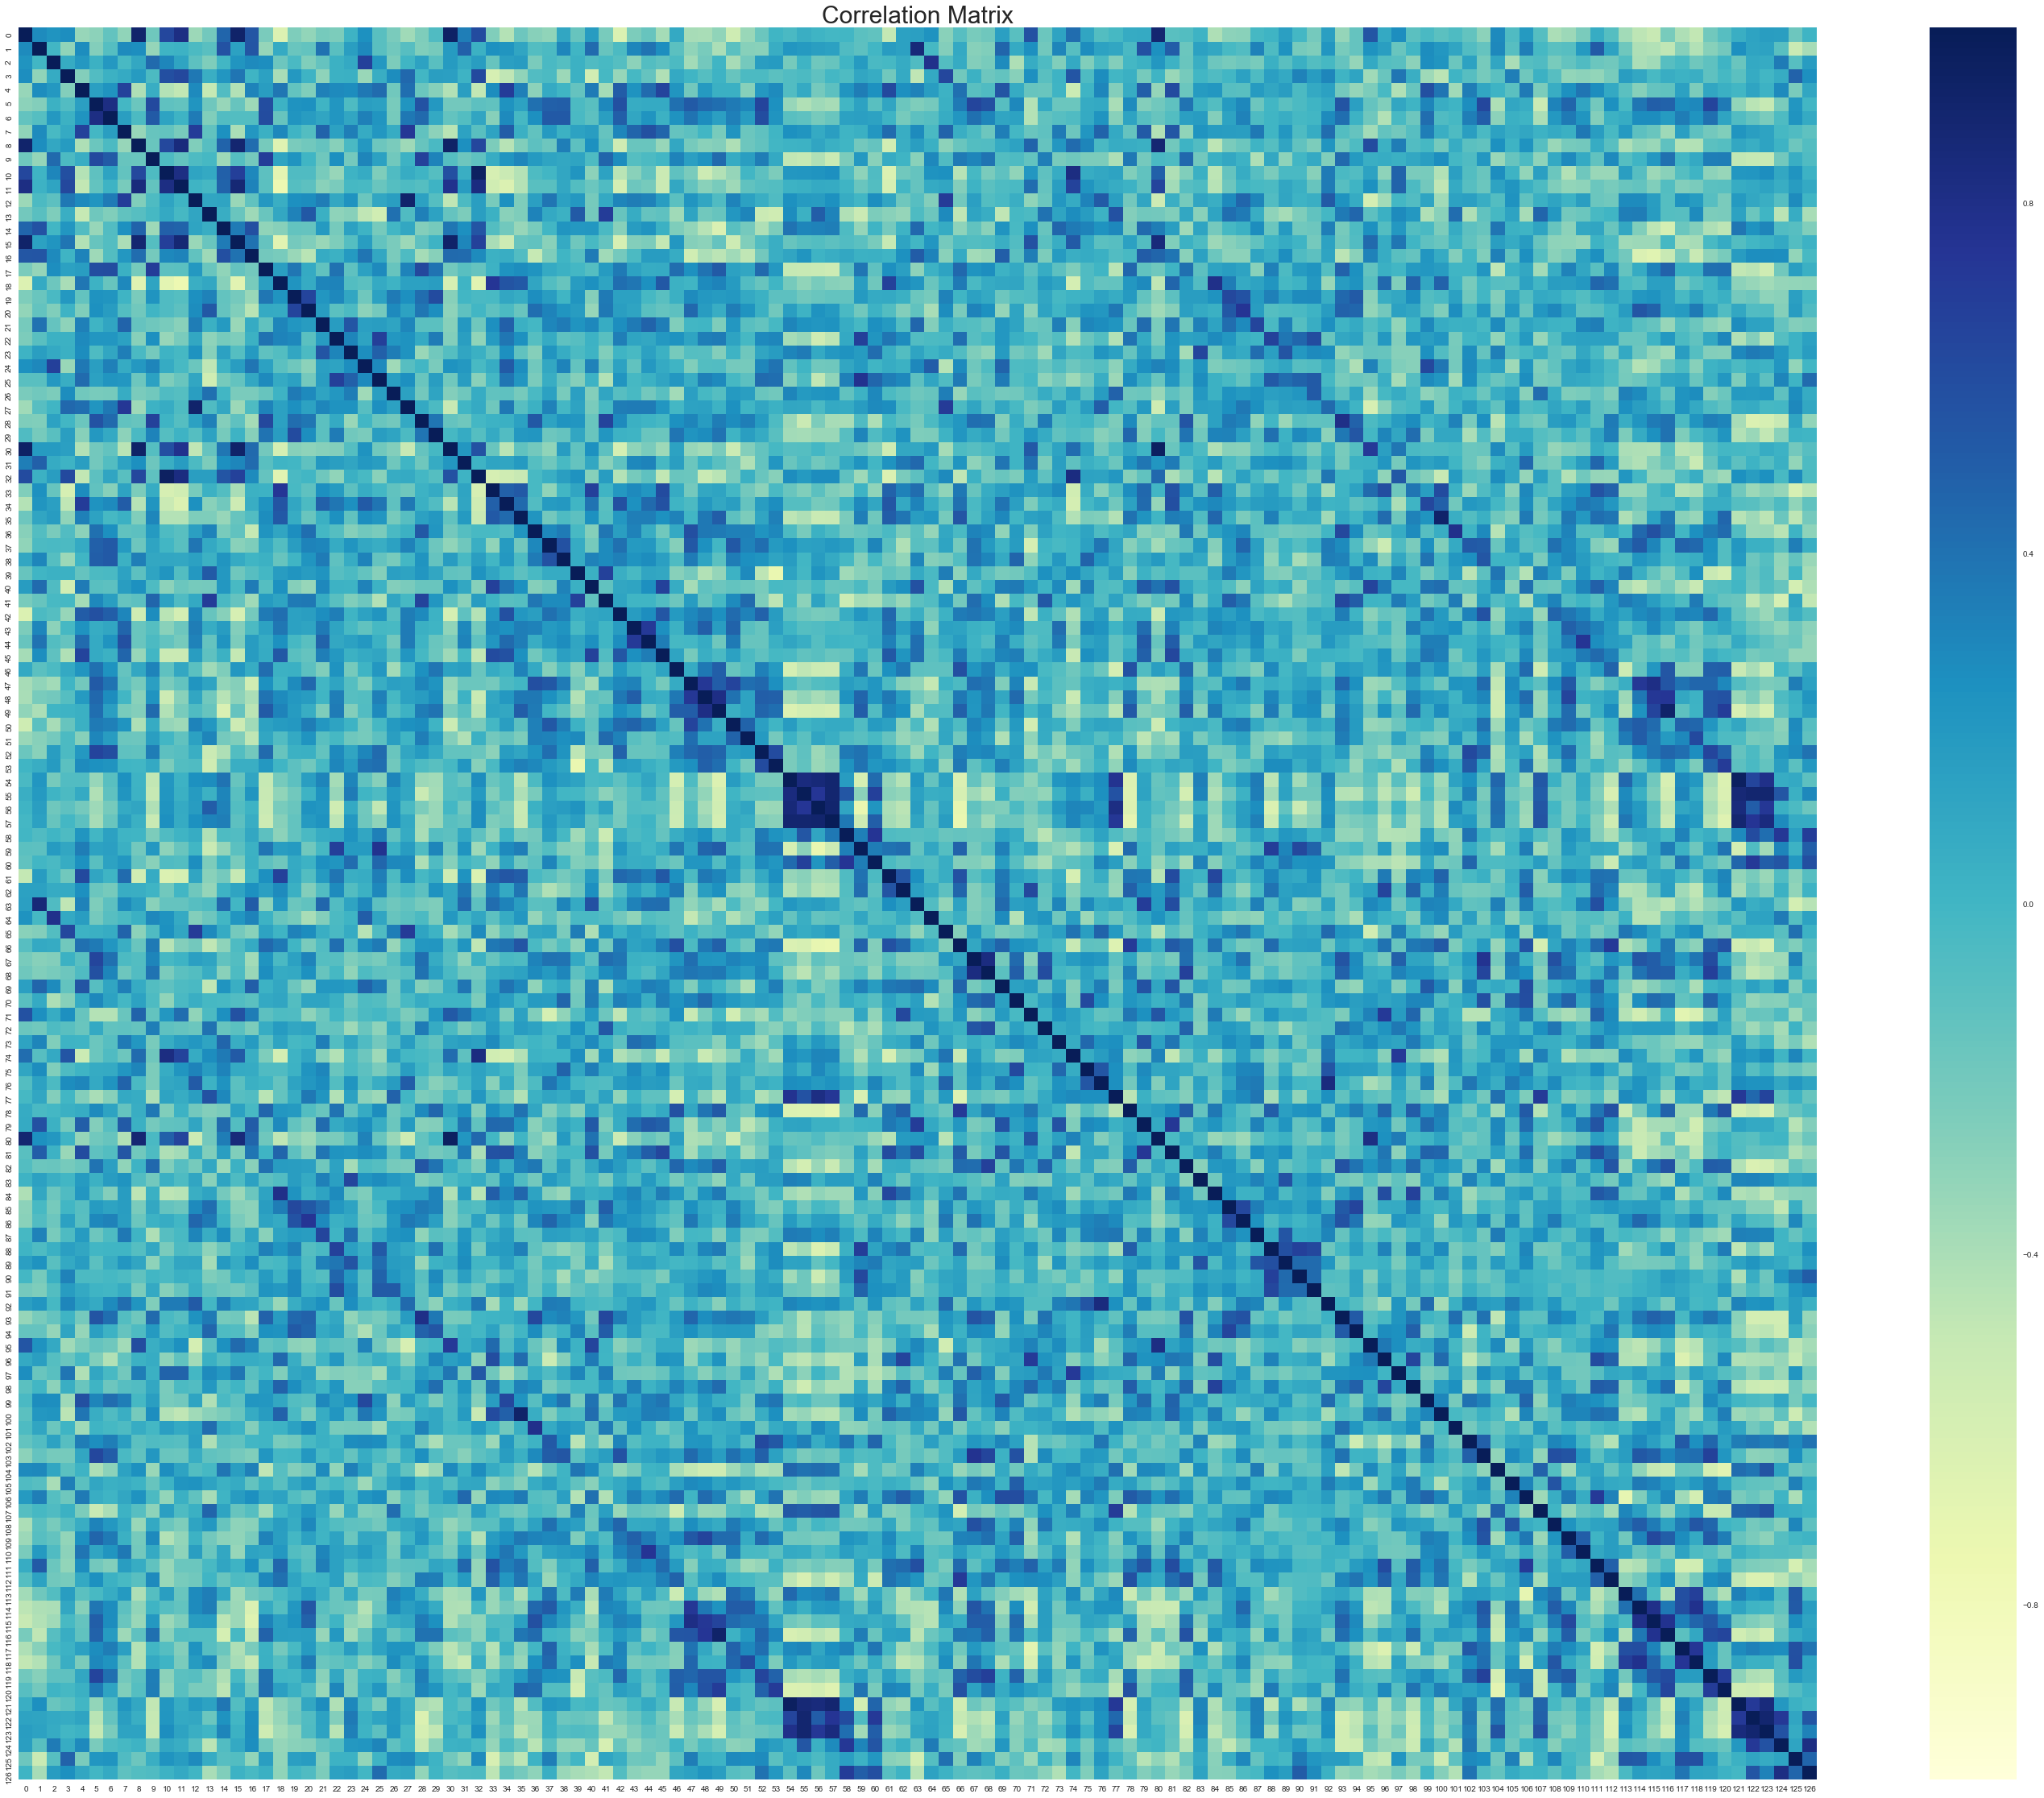

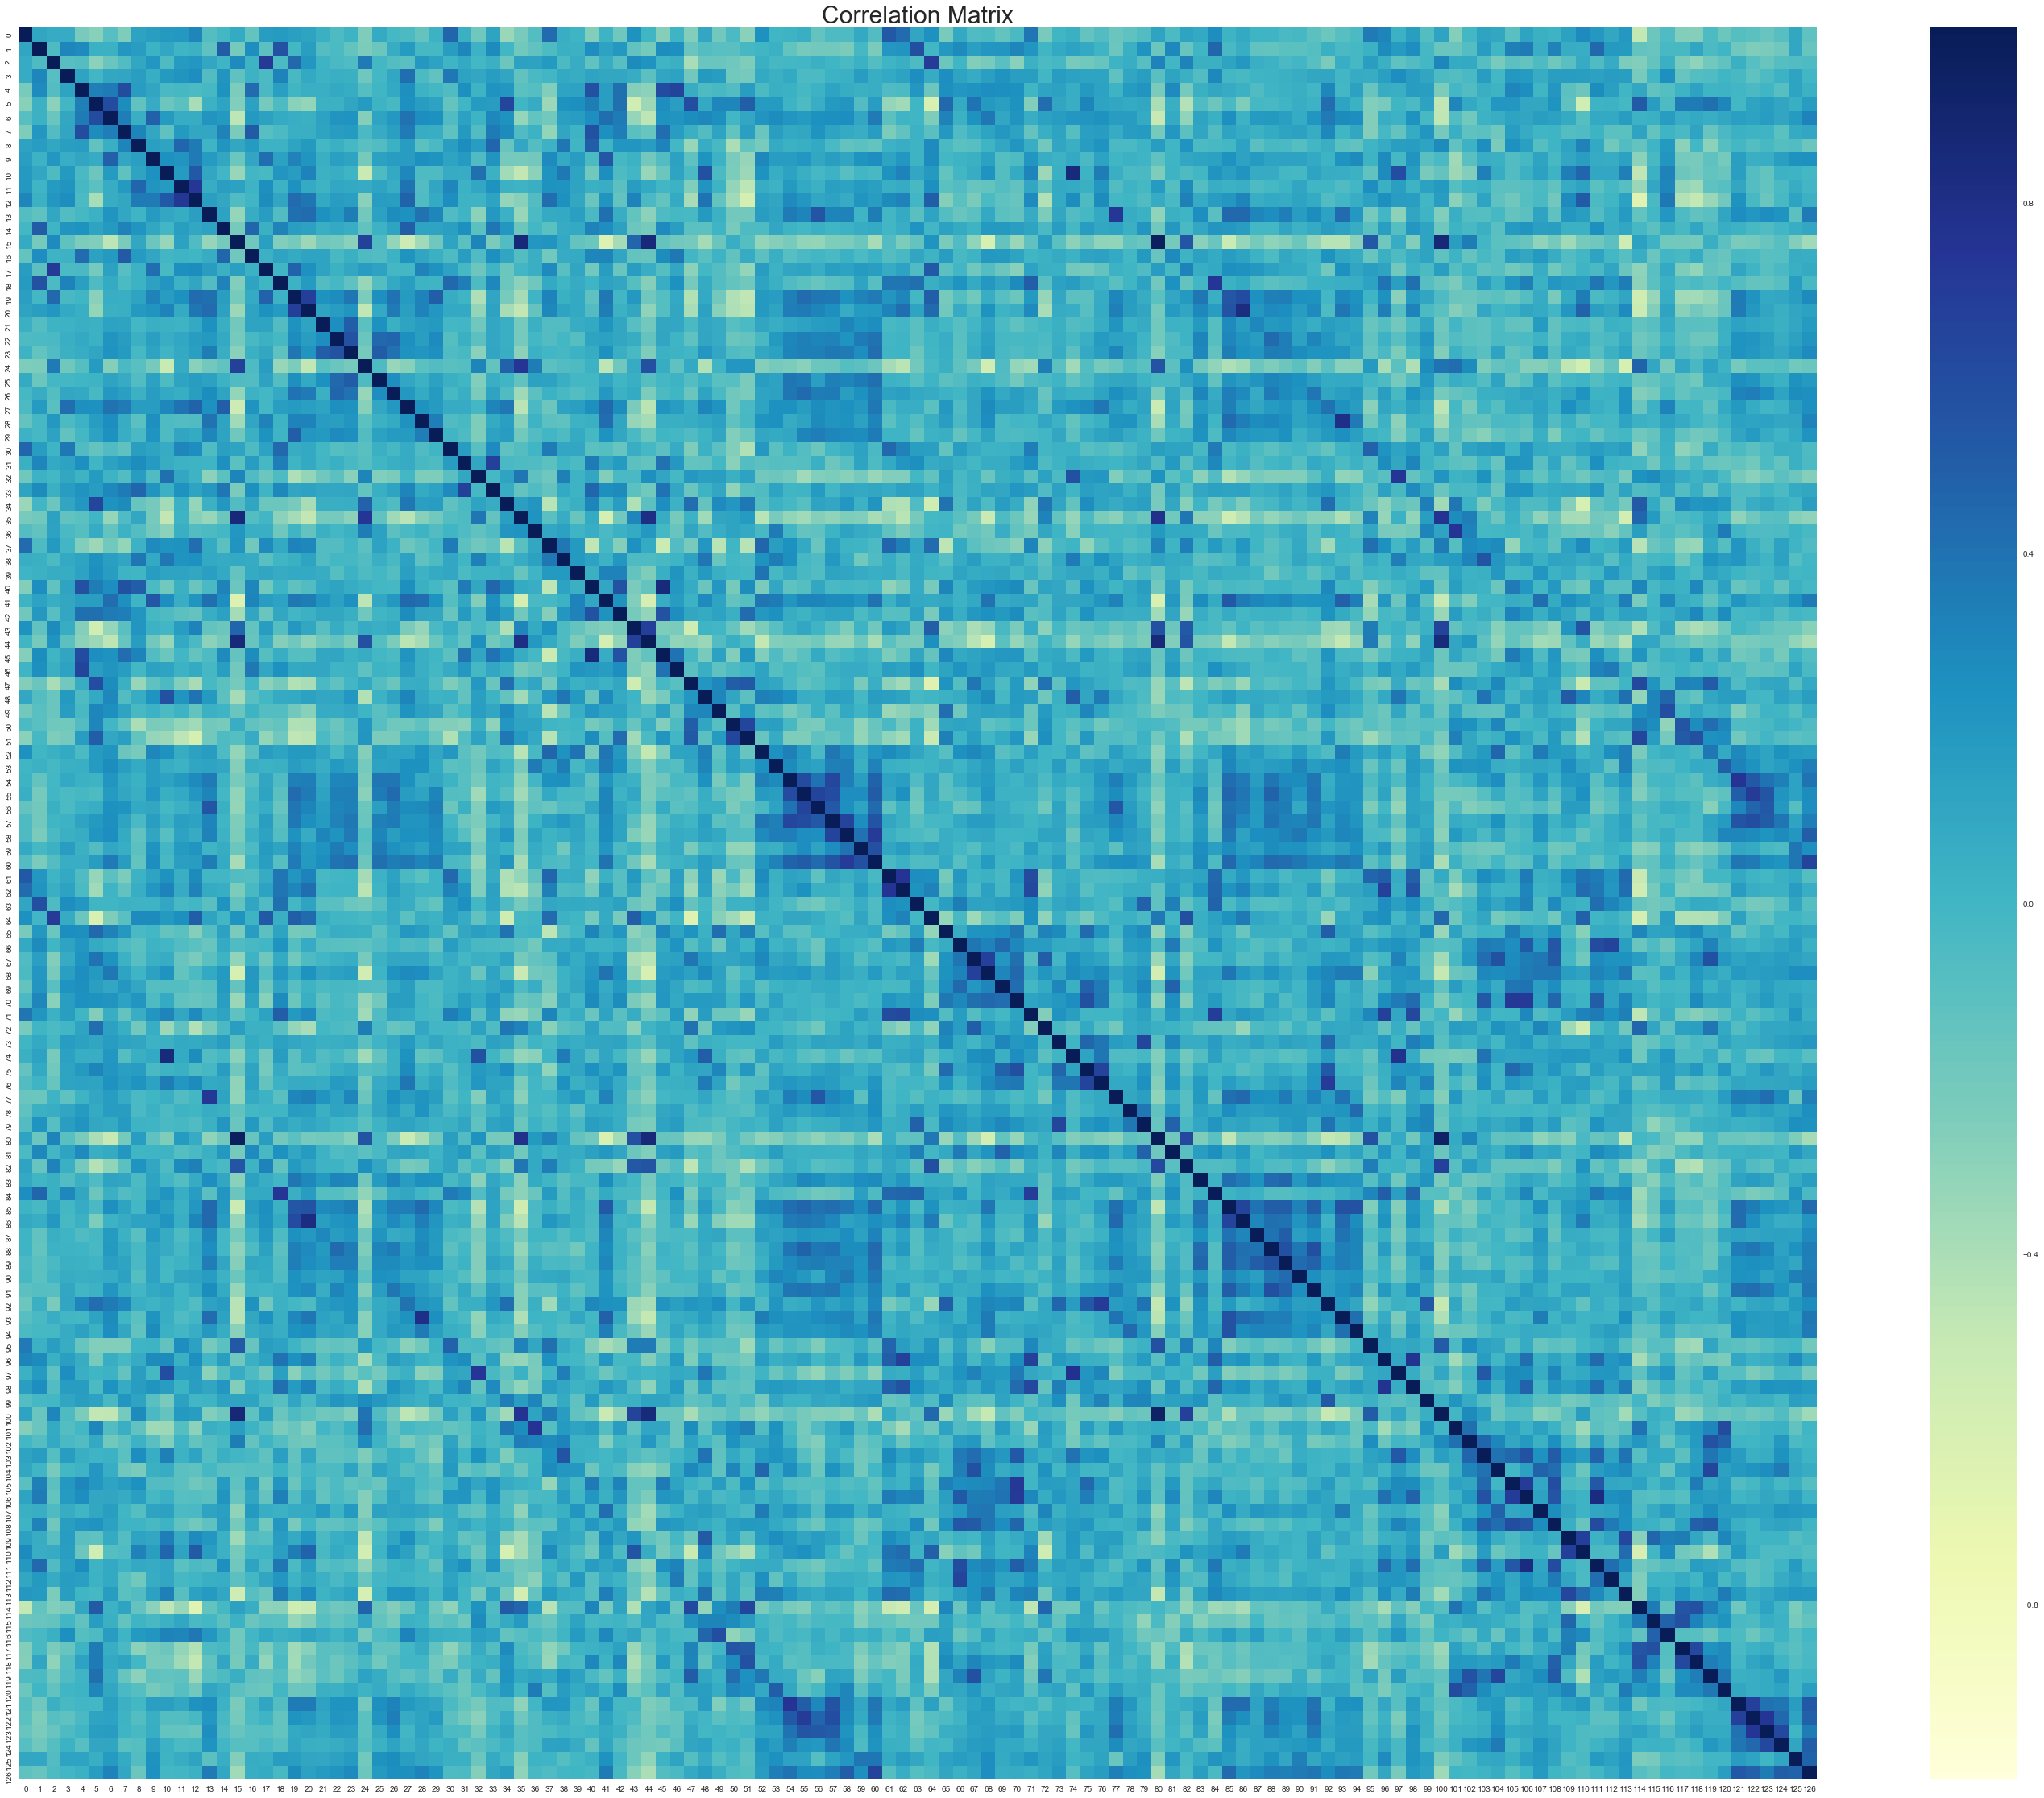

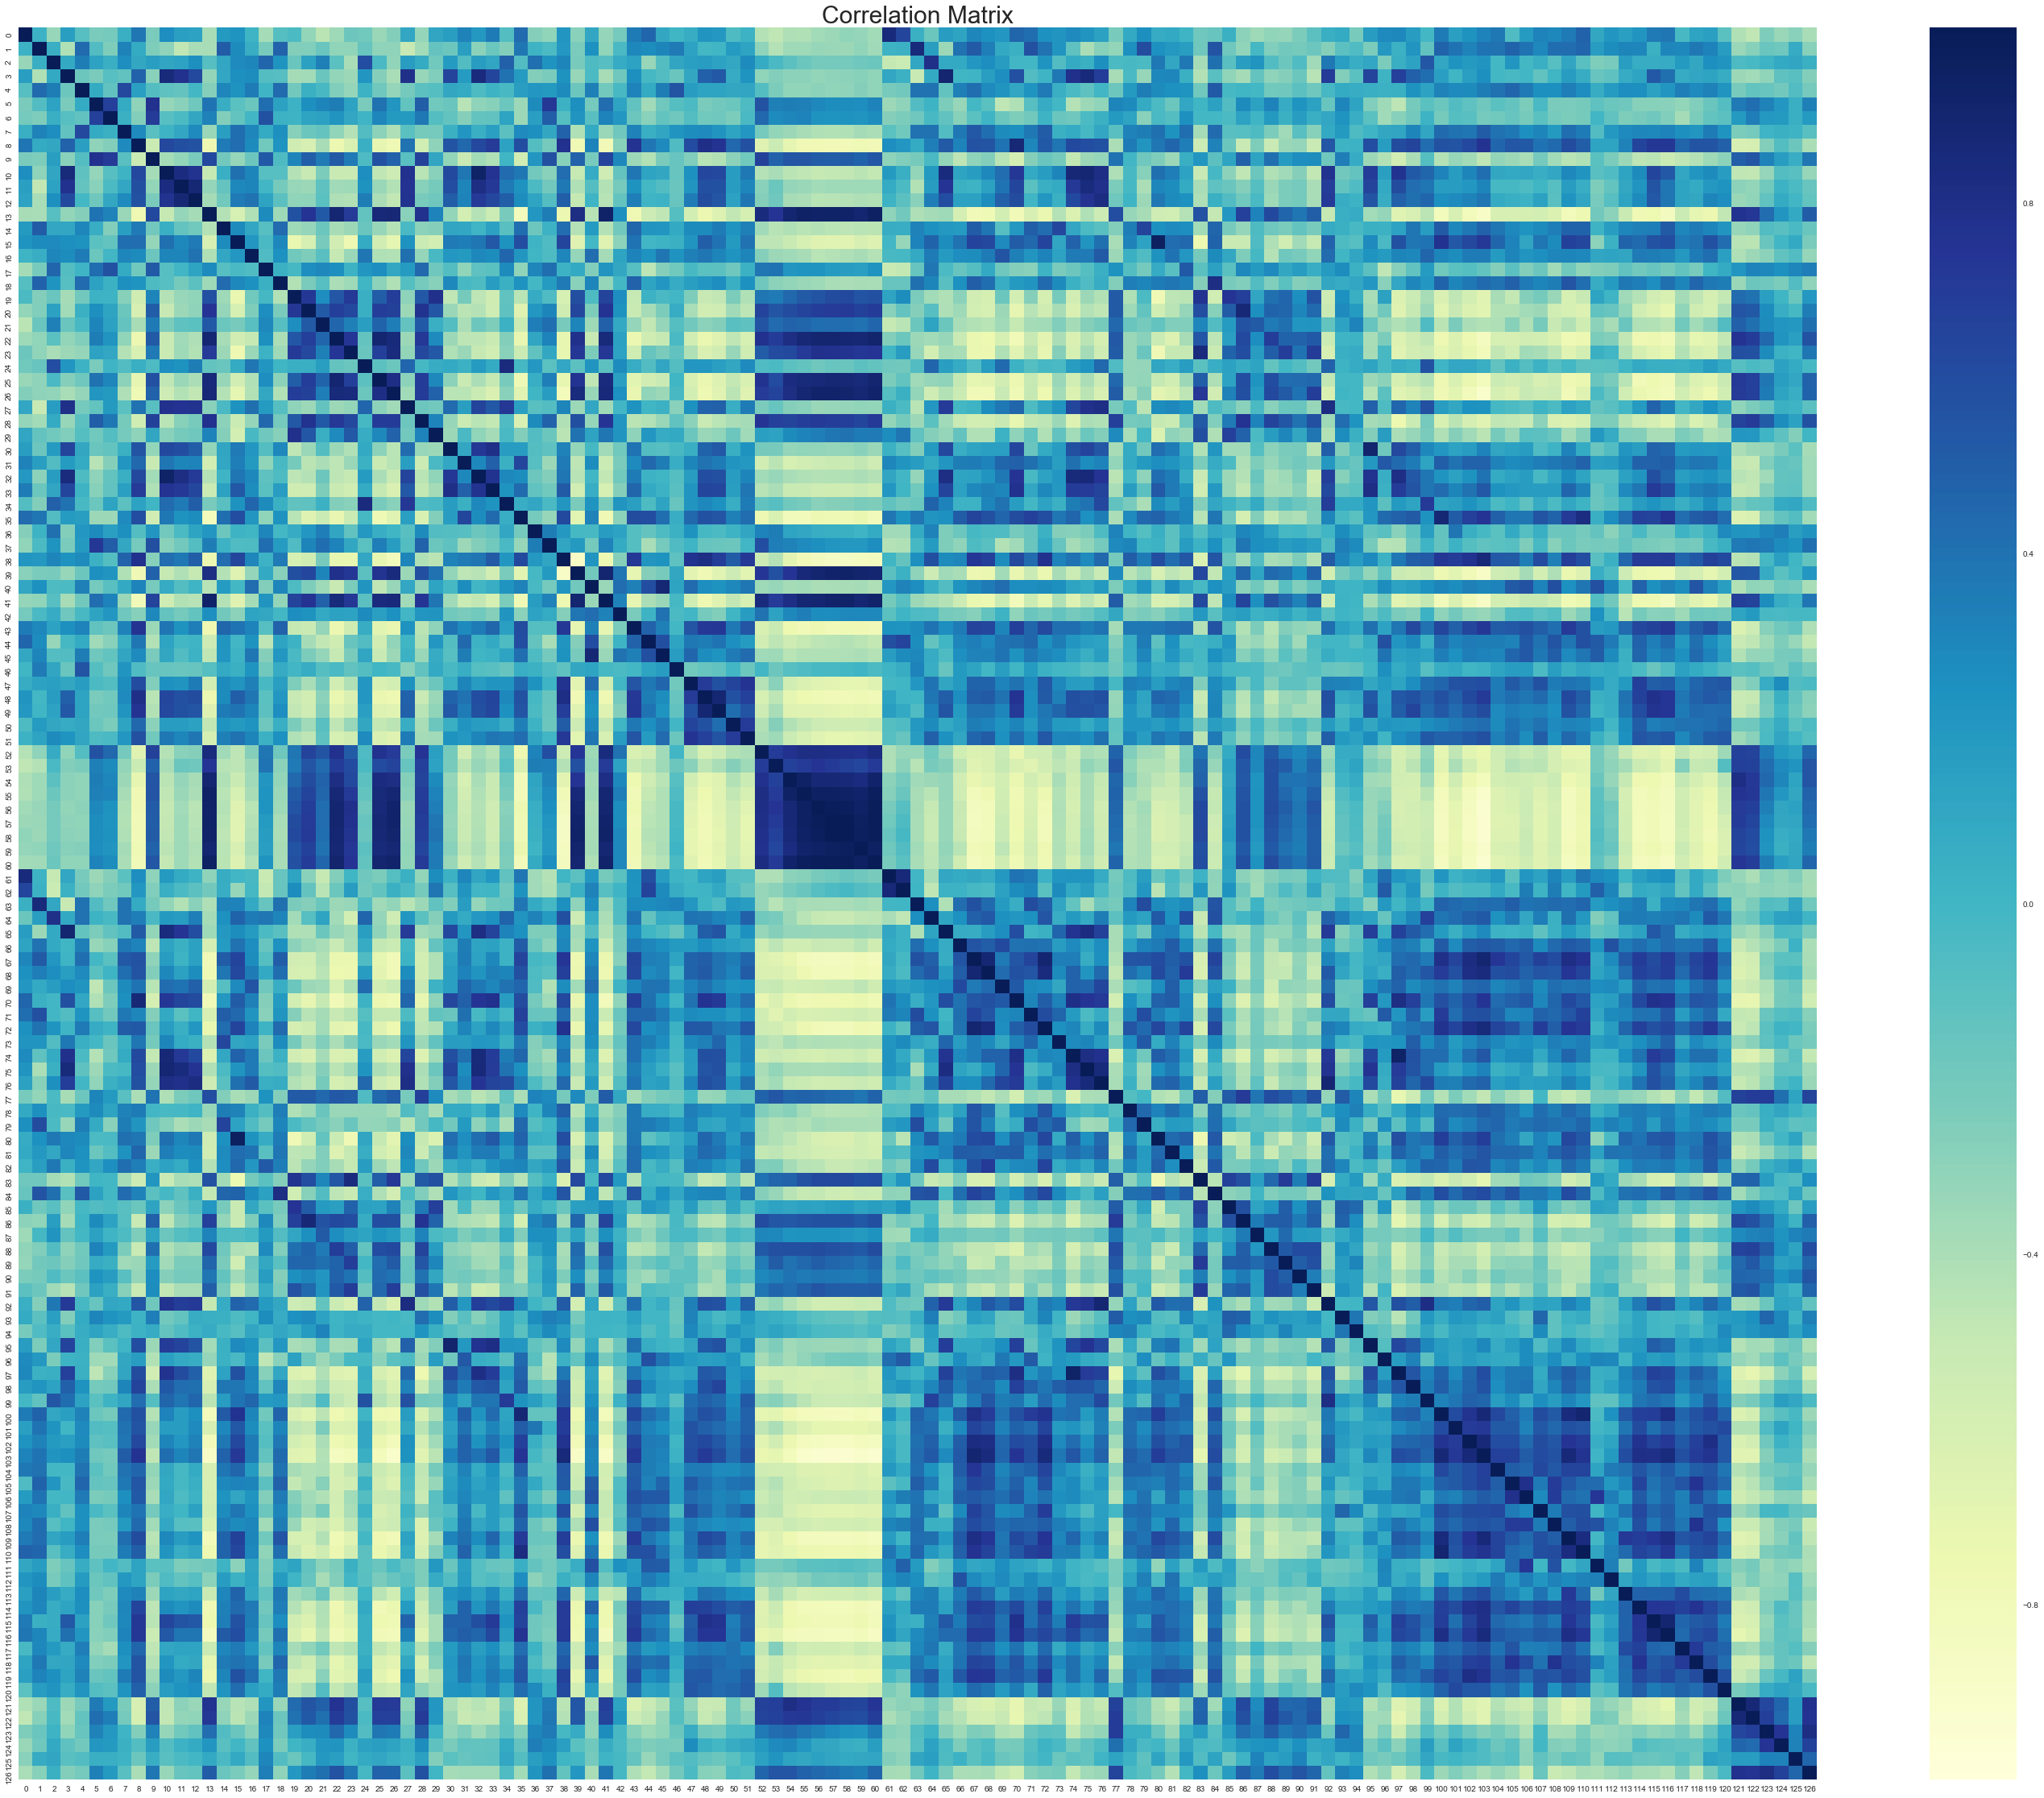

In [73]:
for df in dfs:
    plot_correlation(df.corr(), "Correlation Matrix")

In [199]:
def plot_individual_activation(run_number):

    df = dfs[run_number]
    
    num_cells = len(df.iloc[0, :])
    num_timepoints = len(df)
    #label_list = custom_sorted_list_from_cell_list(list(set(get_cell_names(orig_leech_runs[0]))))
    
    arr = np.zeros([num_cells, num_timepoints])
    arr += np.array(df).T
    
    #name = mod_leech_runs[i]
    
        
    matshow_w_correct_axis(arr, "Activation for Run " + str(run_number) + " for Each Timestep", 
                           x=num_timepoints, y=num_cells, s=(40, 10), colorbar=True, height=20, vrange = [-6,6])
                           #start_vlines=[i-1 for i in start_times], end_vlines=[j-1 for j in end_times], 
                           #label_list=label_list, custom_labels=custom_labels)

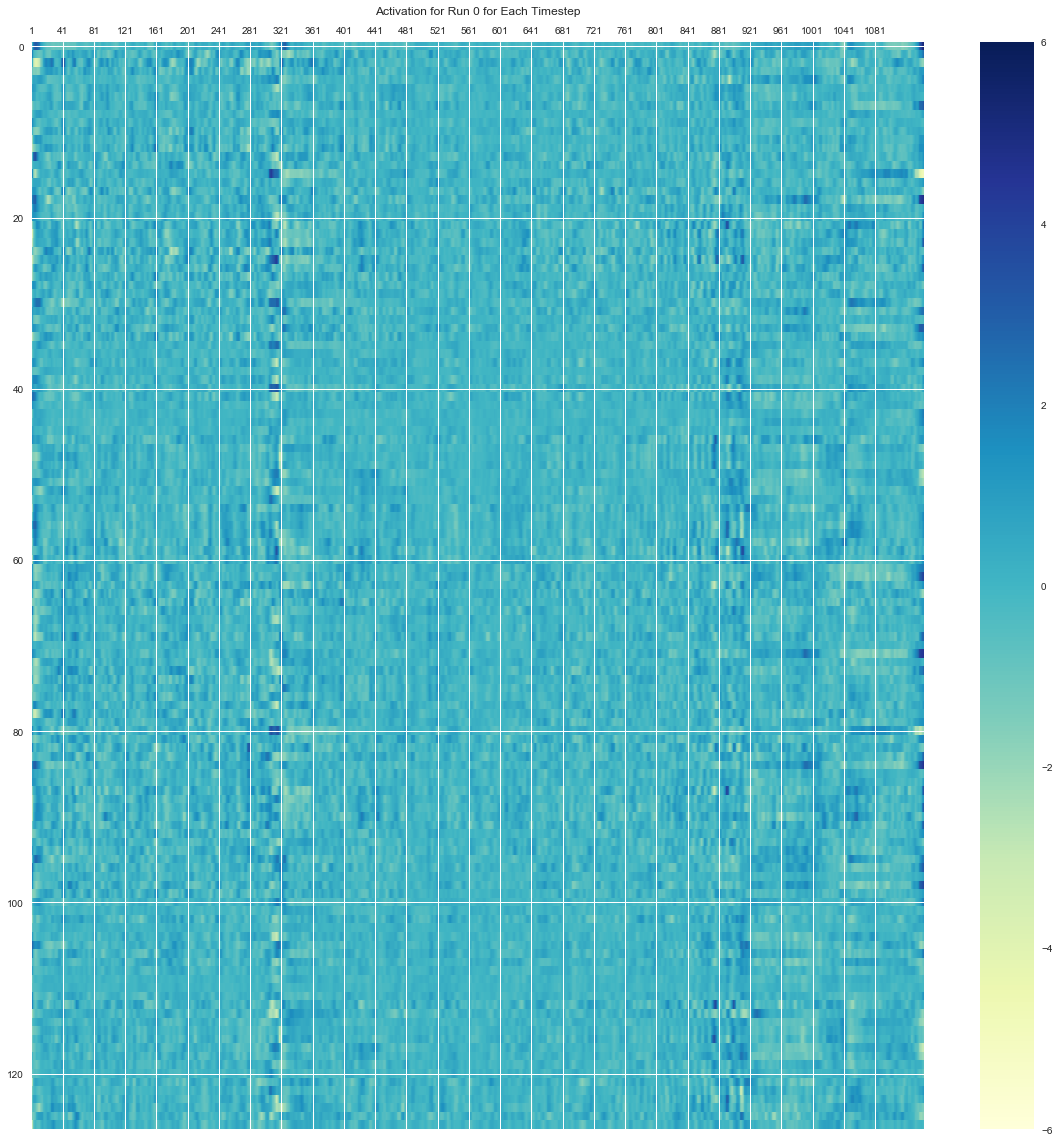

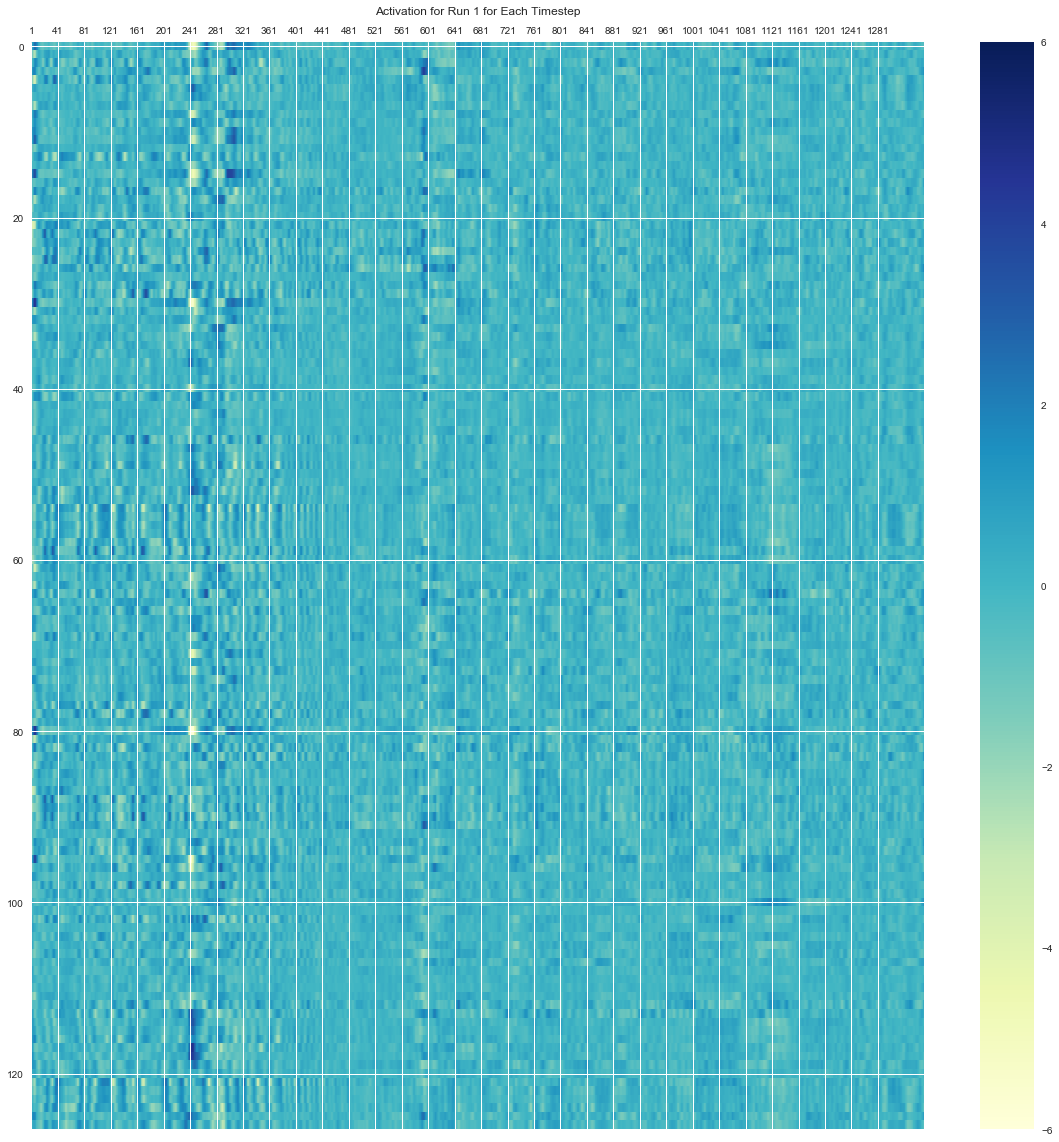

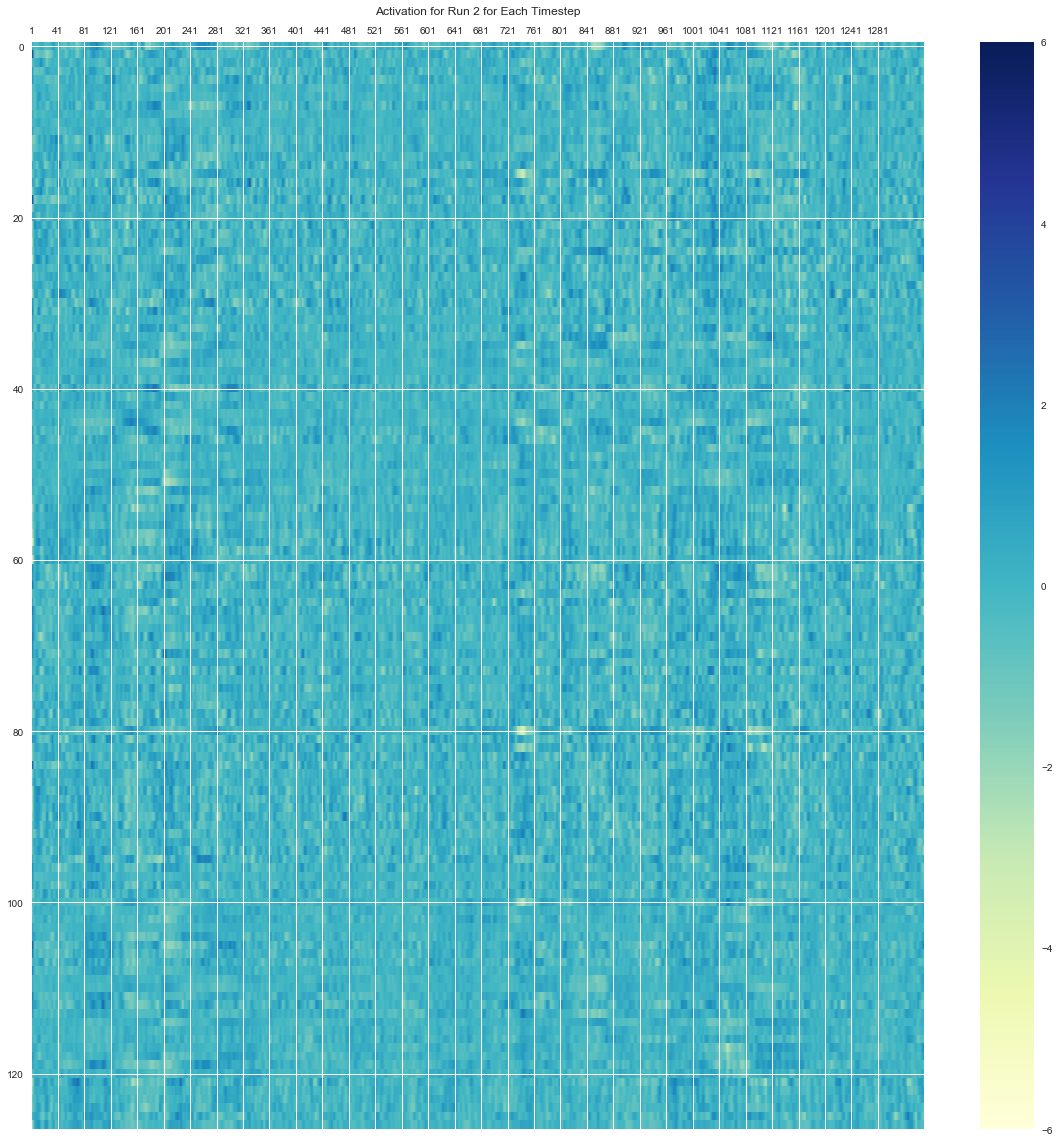

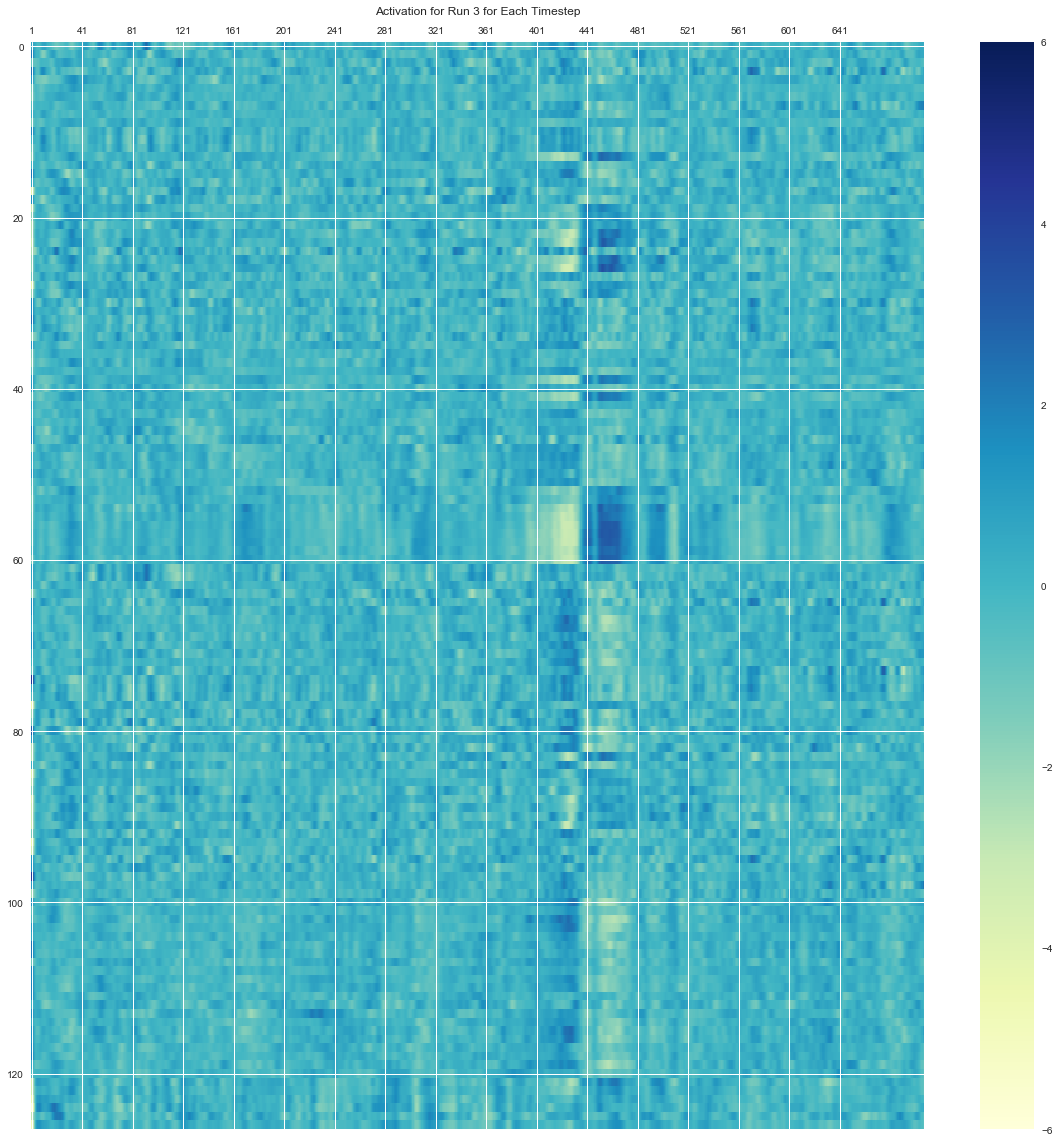

In [200]:
for i in range(4):
    plot_individual_activation(i)